In [7]:
import pandas as pd
from tsfeatures import acf_features

df = pd.read_csv('data/week8/40 Second Data/1504lookright40seconds.csv', header=None, names=['time', 'value'])

window_size = 50  

for feature_name in ['x_acf1', 'x_acf10', 'diff1_acf1', 'diff1_acf10', 'diff2_acf1', 'diff2_acf10']:
    df[feature_name] = float('nan')
    
for end in range(window_size, len(df)):
    start = end - window_size
    window = df['value'].iloc[start:end].values
    acf_feats = acf_features(window)
    
    df.loc[end, acf_feats.keys()] = acf_feats.values()


# df.to_csv('your_updated_data.csv', index=False)


In [8]:
df


,time,value,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10
0,0.0000,513.260641,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0001,513.257387,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0002,513.253803,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0003,513.249881,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0004,513.245612,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
399915,39.9996,510.391064,0.941608,4.885719,0.933767,4.502783,0.940413,4.771423
399916,39.9997,510.447297,0.941593,4.885462,0.933287,4.480568,0.940311,4.767545
399917,39.9998,510.503481,0.941576,4.885145,0.932765,4.456398,0.940205,4.763496
399918,39.9999,510.559601,0.941558,4.884773,0.932195,4.430015,0.940094,4.759272


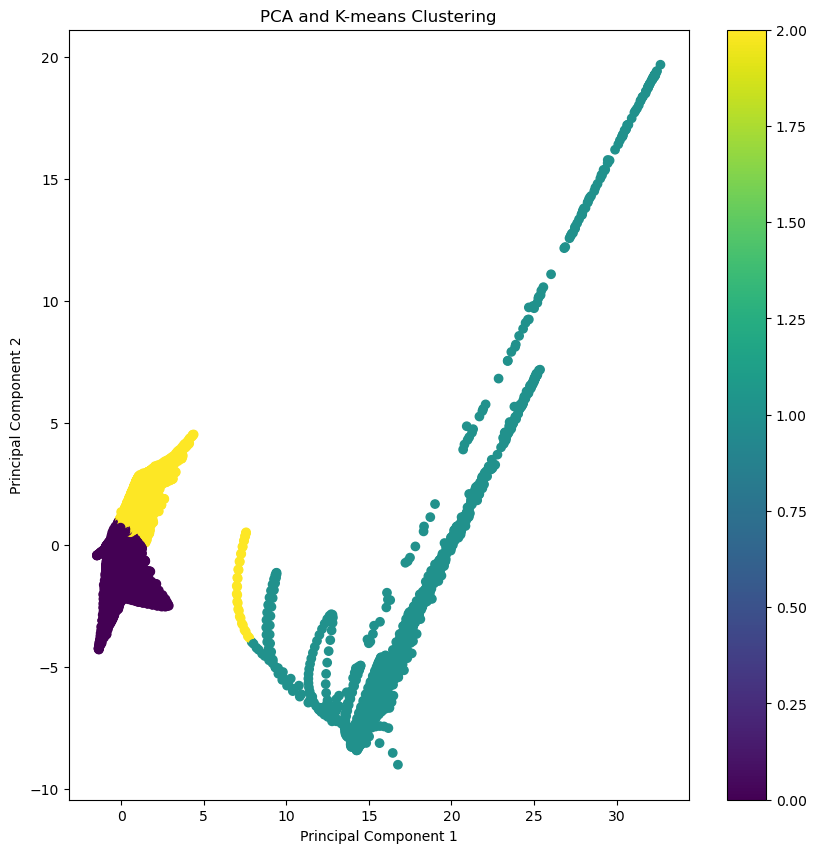

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_clean = df.dropna().reset_index(drop=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean.drop(['time'], axis=1))

pca = PCA(n_components=2)  
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

kmeans = KMeans(n_clusters=3)  
cluster_labels = kmeans.fit_predict(principal_df)


principal_df['Cluster'] = cluster_labels

plt.figure(figsize=(10,10))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['Cluster'], cmap='viridis')
plt.title('PCA and K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


0    395874
1      3996
Name: anomaly, dtype: int64


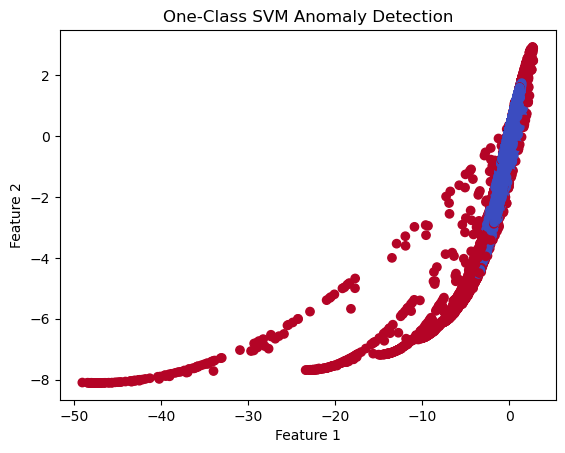

In [16]:
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = df.dropna().reset_index(drop=True)
data = df[['x_acf1', 'x_acf10', 'diff1_acf1', 'diff1_acf10', 'diff2_acf1', 'diff2_acf10']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

oc_svm = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
oc_svm.fit(data_scaled)

df['anomaly'] = oc_svm.predict(data_scaled)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1}) 

print(df['anomaly'].value_counts())

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=df['anomaly'], cmap='coolwarm')
plt.title('One-Class SVM Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [17]:
df

,time,value,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,anomaly
0,0.005001,512.533416,0.935790,4.635390,0.940357,4.802443,0.946139,4.912515,0
1,0.005101,512.504444,0.936024,4.645572,0.940496,4.807701,0.945941,4.895428,0
2,0.005201,512.474868,0.936249,4.655353,0.940630,4.812819,0.945681,4.874381,0
3,0.005301,512.444690,0.936466,4.664757,0.940761,4.817796,0.945344,4.848484,0
4,0.005401,512.413916,0.936676,4.673811,0.940888,4.822632,0.944909,4.816611,0
...,...,...,...,...,...,...,...,...,...
399865,39.999600,510.391064,0.941608,4.885719,0.933767,4.502783,0.940413,4.771423,0
399866,39.999700,510.447297,0.941593,4.885462,0.933287,4.480568,0.940311,4.767545,0
399867,39.999800,510.503481,0.941576,4.885145,0.932765,4.456398,0.940205,4.763496,0
399868,39.999900,510.559601,0.941558,4.884773,0.932195,4.430015,0.940094,4.759272,0


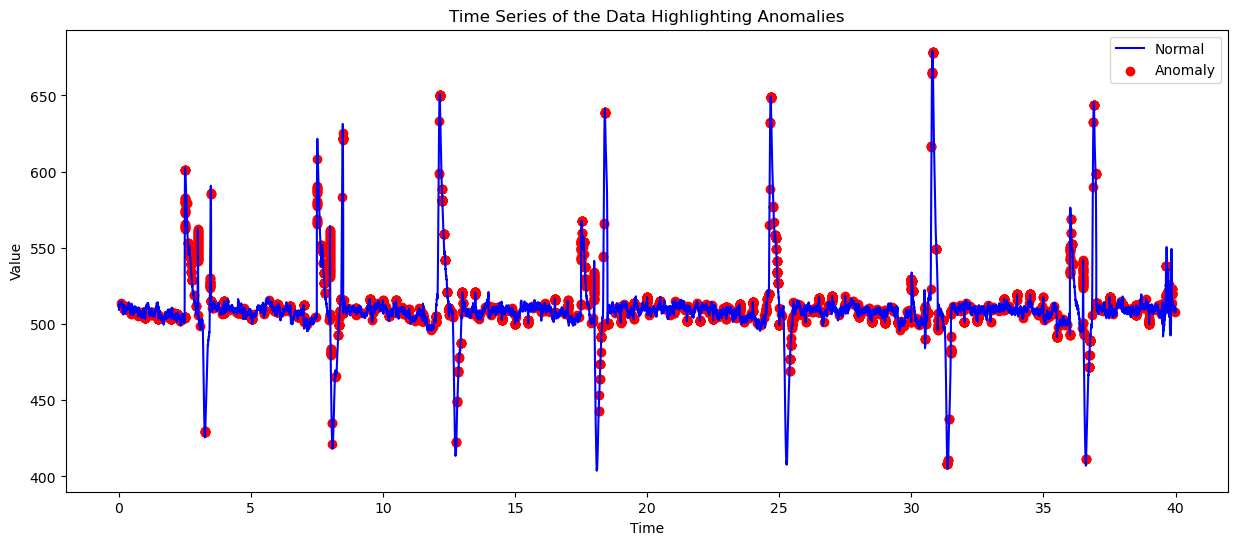

In [18]:
normal = df[df['anomaly'] == 0]
anomalies = df[df['anomaly'] == 1]

plt.figure(figsize=(15, 6))
plt.plot(normal['time'], normal['value'], color='blue', label='Normal')
plt.scatter(anomalies['time'], anomalies['value'], color='red', label='Anomaly')
plt.legend()


plt.title('Time Series of the Data Highlighting Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()